## Data Visualization
#### Preliminary Exploration of the Data

In [24]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

In [25]:
# code from lab 6
def standardize(data):
    '''Standardize a dataframe'''
    mean_vec = np.mean(data, axis=0)
    sd_vec = np.std(data, axis=0)

    data_std = data.copy()
    for i in range(data.shape[1]): # for every column
        data_std[:,i] = (data[:,i] - mean_vec[i]*np.ones(data.shape[0]))/sd_vec[i]
        
    return data_std

In [58]:
weather_pd = pd.read_csv('weather.csv', index_col = 0)
# smaller dataset without temporal info / faulty variables
weather_small = weather_pd.drop(['DAY', 'STP', 'GUST'], axis=1)
# 'YEAR', 'MONTH', 'SEASON', 'SNDP'
# convert to numpy
weather = weather_small.to_numpy()
weather_std = standardize(weather)

In [59]:
weather_pd.head()

,YEAR,MONTH,DAY,SEASON,TEMP,DEWP,SLP,STP,VISIB,WDSP,MXSPD,GUST,MAX,MIN,PRCP,SNDP
0,2000,1,1,0,47.6,38.1,1023.7,999.9,8.3,3.0,10.1,0.0,66.9,33.1,0.00,0.0
1,2000,1,2,0,55.3,46.3,1024.2,999.9,9.5,4.8,14.0,0.0,70.0,33.1,0.00,0.0
2,2000,1,3,0,62.6,55.4,1021.3,999.9,8.4,8.5,14.0,0.0,73.9,43.0,0.00,0.0
3,2000,1,4,0,65.2,58.6,1014.4,999.9,9.5,15.3,28.0,35.9,73.9,55.0,0.00,0.0
4,2000,1,5,0,45.7,30.9,1019.8,999.9,9.8,6.4,11.1,18.1,57.9,37.0,0.34,0.0


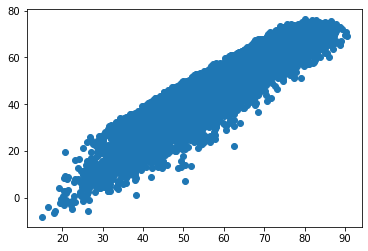

In [60]:
plt.scatter(weather_pd['TEMP'], weather_pd['DEWP'])

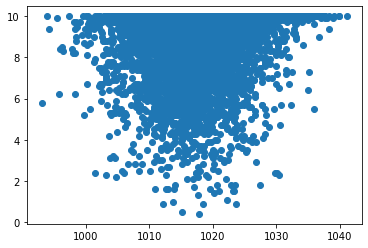

In [61]:
plt.scatter(weather_pd['SLP'], weather_pd['VISIB'])

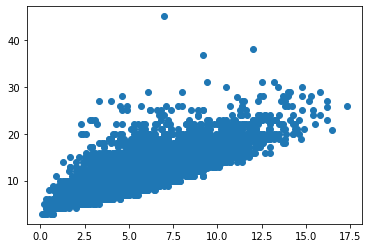

In [62]:
plt.scatter(weather_pd['WDSP'], weather_pd['MXSPD'])

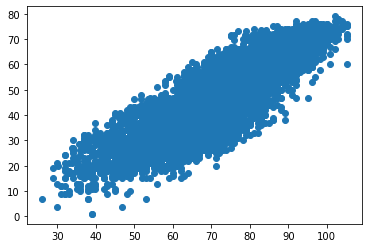

In [63]:
plt.scatter(weather_pd['MAX'], weather_pd['MIN'])

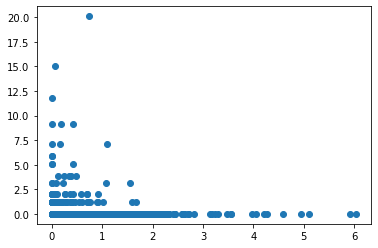

In [64]:
plt.scatter(weather_pd['PRCP'], weather_pd['SNDP'])

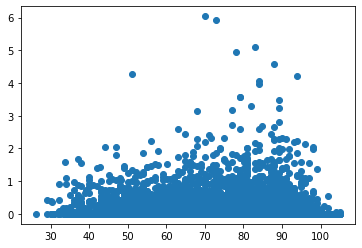

In [65]:
plt.scatter(weather_pd['MAX'], weather_pd['PRCP'])

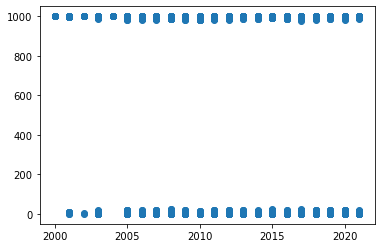

In [66]:
plt.scatter(weather_pd['YEAR'], weather_pd['STP'])

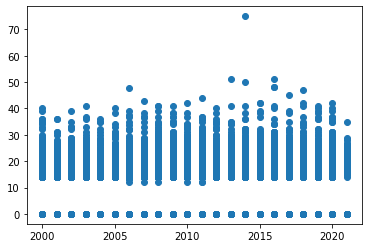

In [67]:
plt.scatter(weather_pd['YEAR'], weather_pd['GUST'])

## Take a look in 2D

In [68]:
# use PCA to plot in 2D
pca = PCA(n_components=2)
weather_two = pca.fit_transform(weather_std)

In [69]:
weather_two.shape

(7772, 2)

In [70]:
weather_two_pd = pd.DataFrame(weather_two, columns=["X", "Y"])
weather_two_pd['SEASON'] = weather_pd['SEASON']
weather_two_pd.head()

,X,Y,SEASON
0,2.195105,0.193222,0.0
1,1.630903,1.017092,0.0
2,0.563440,1.996067,0.0
3,-0.452604,5.557136,0.0
4,2.368835,1.315603,0.0


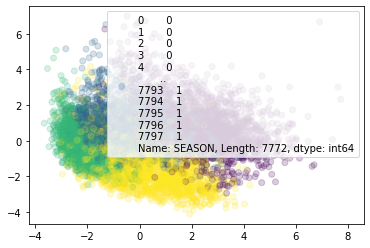

In [71]:
# not a great plot
fig, ax = plt.subplots()

ax.scatter(weather_two[:,0], weather_two[:,1], c=weather_pd['SEASON'], label=weather_pd['SEASON'], alpha=0.2)
ax.legend()

<AxesSubplot:xlabel='X', ylabel='Y'>

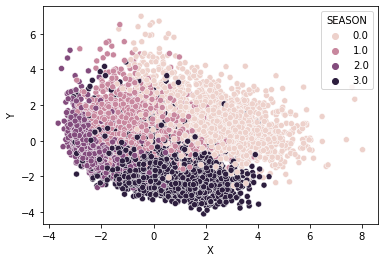

In [72]:
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=weather_two_pd, x="X", y="Y", hue="SEASON")

## Take a look in 3D

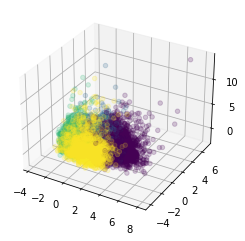

In [73]:
pca3 = PCA(n_components=3)
weather_three = pca3.fit_transform(weather_std)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(weather_three[:,0], weather_three[:,1], weather_three[:,2], c=weather_pd['SEASON'], alpha=0.2)